In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import pearsonr

In [3]:
# Store filepath into variable
healthcare_dataset_csv = Path("Data/healthcare_dataset.csv")

In [4]:
# Reading in file.
# adding three boolean columns for all the 3 diseases(0 = 'FALSE', 1 = 'TRUE').
healthcare_dataset_df = pd.read_csv(healthcare_dataset_csv)
healthcare_dataset_df['hypertension_bool'] = healthcare_dataset_df['hypertension'].astype(bool)
healthcare_dataset_df['heart_disease_bool'] = healthcare_dataset_df['heart_disease'].astype(bool)
healthcare_dataset_df['diabetes_bool'] = healthcare_dataset_df['diabetes'].astype(bool)
healthcare_dataset_df.head()

C:\Users\kengt\AppData\Local\Temp\ipykernel_23192\3771533945.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  healthcare_dataset_df = pd.read_csv(healthcare_dataset_csv)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Unnamed: 9,Unnamed: 10,Questions,hypertension_bool,heart_disease_bool,diabetes_bool
0,Female,80.0,0,1,never,25.19,6.6,140,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,NaN,NaN,Is there a correlation between gender/sex of t...,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False


In [17]:
#handling missing values
healthcare_dataset_df.isnull().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
diabetes                    0
Unnamed: 9             100000
Unnamed: 10            100000
Questions               99993
hypertension_bool           0
heart_disease_bool          0
diabetes_bool               0
dtype: int64

In [18]:
# removing duplicate rows.
healthcare_dataset_df = healthcare_dataset_df.drop_duplicates()

In [19]:
# renaming the Column header Names:
healthcare_dataset_df.columns = healthcare_dataset_df.columns.str.upper()
healthcare_dataset_df.head()

,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,UNNAMED: 9,UNNAMED: 10,QUESTIONS,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80.0,0,1,never,25.19,6.6,140,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,NaN,NaN,Is there a correlation between gender/sex of t...,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False


In [20]:
# Converting Data Types:
healthcare_dataset_df['AGE'] = healthcare_dataset_df['AGE'].astype(int)
healthcare_dataset_df['BLOOD_GLUCOSE_LEVEL'] = healthcare_dataset_df['BLOOD_GLUCOSE_LEVEL'].astype(float)
healthcare_dataset_df.head()

,GENDER,AGE,HYPERTENSION,HEART_DISEASE,SMOKING_HISTORY,BMI,HBA1C_LEVEL,BLOOD_GLUCOSE_LEVEL,DIABETES,UNNAMED: 9,UNNAMED: 10,QUESTIONS,HYPERTENSION_BOOL,HEART_DISEASE_BOOL,DIABETES_BOOL
0,Female,80,0,1,never,25.19,6.6,140.0,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
1,Female,54,0,0,No Info,27.32,6.6,80.0,0,NaN,NaN,Is there a correlation between gender/sex of t...,False,False,False
2,Male,28,0,0,never,27.32,5.7,158.0,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36,0,0,current,23.45,5.0,155.0,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76,1,1,current,20.14,4.8,155.0,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False


In [24]:
# Calculate correlation coefficient between age and hypertension
correlation_age_hypertension, _ = pearsonr(healthcare_dataset_df['AGE'], healthcare_dataset_df['HYPERTENSION_BOOL'])
print(f"Correlation between age and hypertension_bool is : {correlation_age_hypertension:.2f}")

Correlation between age and hypertension_bool is : 0.26


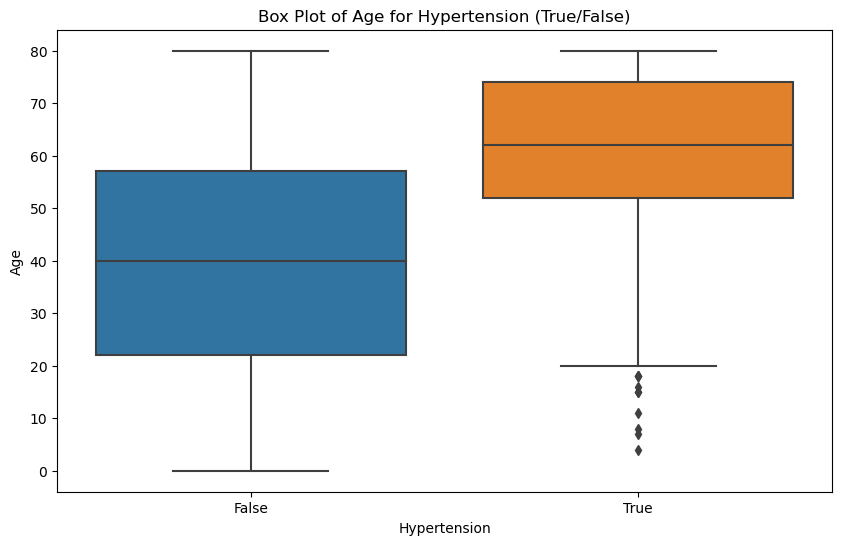

In [25]:

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HYPERTENSION_BOOL', y='AGE', data=healthcare_dataset_df)
plt.title('Box Plot of Age for Hypertension (True/False)')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.show()


In [26]:
# Calculate correlation coefficient between age and heart_disease
correlation_age_heart_disease, _ = pearsonr(healthcare_dataset_df['AGE'], healthcare_dataset_df['HEART_DISEASE_BOOL'])
print(f"Correlation between age and heart disease is : {correlation_age_heart_disease:.2f}")

Correlation between age and heart disease is : 0.24


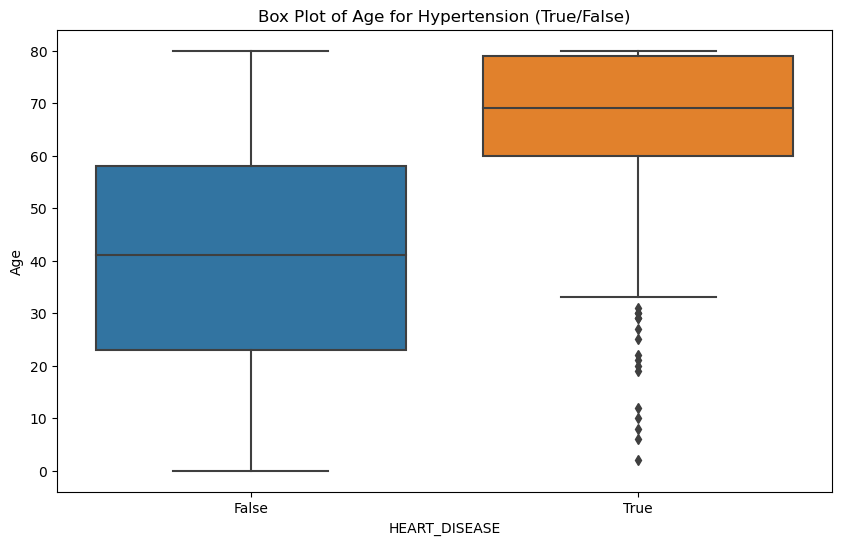

In [27]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HEART_DISEASE_BOOL', y='AGE', data=healthcare_dataset_df)
plt.title('Box Plot of Age for Hypertension (True/False)')
plt.xlabel('HEART_DISEASE')
plt.ylabel('Age')
plt.show()

# What's the correlation between smoking history and the three diseases?

In [31]:
# Remove rows with 'No Info' in smoking_status column
healthcare_dataset_smoke_df = healthcare_dataset_df[healthcare_dataset_df['smoking_history'] != 'No Info']
healthcare_dataset_smoke_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Unnamed: 9,Unnamed: 10,Questions,hypertension_bool,heart_disease_bool,diabetes_bool
0,Female,80.0,0,1,never,25.19,6.6,140,0,NaN,NaN,Is there a correlation between age of the pati...,False,True,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,NaN,NaN,What age group is diabetic?,False,False,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,NaN,NaN,What age group suffers from heart disease and ...,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,NaN,NaN,Find the correlation between bmi and blood_sug...,True,True,False
5,Female,20.0,0,0,never,27.32,6.6,85,0,NaN,NaN,What's the correlation between HbA1c level and...,False,False,False


In [32]:
# Calculate correlation coefficient between smoking history and (diabetes) 
correlation_smoking_diabetes_never, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'never', healthcare_dataset_smoke_df['diabetes_bool'])
correlation_smoking_diabetes_current, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'current', healthcare_dataset_smoke_df['diabetes_bool'])
correlation_smoking_diabetes_former, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'former', healthcare_dataset_smoke_df['diabetes_bool'])
correlation_smoking_diabetes_ever, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'ever', healthcare_dataset_smoke_df['diabetes_bool'])
correlation_smoking_diabetes_not_current, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'not current', healthcare_dataset_smoke_df['diabetes_bool'])


print(f"Correlation between a 'Never'smoking history and diabetes is : {correlation_smoking_diabetes_never:.4f}")
print(f"Correlation between a 'current'smoking history and diabetes is : {correlation_smoking_diabetes_current:.4f}")
print(f"Correlation between a 'former'smoking history and diabetes is : {correlation_smoking_diabetes_former:.4f}")
print(f"Correlation between a 'ever'smoking history and diabetes is : {correlation_smoking_diabetes_ever:.4f}")
print(f"Correlation between a 'not current'smoking history and diabetes is : {correlation_smoking_diabetes_not_current:.4f}")

Correlation between a 'Never'smoking history and diabetes is : -0.0507
Correlation between a 'current'smoking history and diabetes is : -0.0101
Correlation between a 'former'smoking history and diabetes is : 0.0796
Correlation between a 'ever'smoking history and diabetes is : 0.0067
Correlation between a 'not current'smoking history and diabetes is : -0.0029


In [28]:
# Calculate correlation coefficient between smoking history and (hypertension)
correlation_smoking_hypertension_never, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'never', healthcare_dataset_smoke_df['hypertension_bool'])
correlation_smoking_hypertension_current, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'current', healthcare_dataset_smoke_df['hypertension_bool'])
correlation_smoking_hypertension_former, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'former', healthcare_dataset_smoke_df['hypertension_bool'])
correlation_smoking_hypertension_ever, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'ever', healthcare_dataset_smoke_df['hypertension_bool'])
correlation_smoking_hypertension_not_current, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'not current', healthcare_dataset_smoke_df['hypertension_bool'])


print(f"Correlation between a 'Never'smoking history and hypertension is : {correlation_smoking_hypertension_never:.4f}")
print(f"Correlation between a 'current'smoking history and hypertension is : {correlation_smoking_hypertension_current:.4f}")
print(f"Correlation between a 'former'smoking history and hypertension is : {correlation_smoking_hypertension_former:.4f}")
print(f"Correlation between a 'ever'smoking history and hypertension is : {correlation_smoking_hypertension_ever:.4f}")
print(f"Correlation between a 'not current'smoking history and hypertension is : {correlation_smoking_hypertension_not_current:.4f}")

Correlation between a 'Never'smoking history and hypertension is : -0.0244
Correlation between a 'current'smoking history and hypertension is : -0.0115
Correlation between a 'former'smoking history and hypertension is : 0.0629
Correlation between a 'ever'smoking history and hypertension is : 0.0059
Correlation between a 'not current'smoking history and hypertension is : -0.0248


In [33]:
# Calculate correlation coefficient between smoking history and (heart disease)
correlation_smoking_hypertension_never, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'never', healthcare_dataset_smoke_df['heart_disease_bool'])
correlation_smoking_hypertension_current, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'current', healthcare_dataset_smoke_df['heart_disease_bool'])
correlation_smoking_hypertension_former, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'former', healthcare_dataset_smoke_df['heart_disease_bool'])
correlation_smoking_hypertension_ever, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'ever', healthcare_dataset_smoke_df['heart_disease_bool'])
correlation_smoking_hypertension_not_current, _ = pearsonr(healthcare_dataset_smoke_df['smoking_history'] == 'not current', healthcare_dataset_smoke_df['heart_disease_bool'])


print(f"Correlation between a 'Never'smoking history and heart disease is : {correlation_smoking_hypertension_never:.4f}")
print(f"Correlation between a 'current'smoking history and heart disease is : {correlation_smoking_hypertension_current:.4f}")
print(f"Correlation between a 'former'smoking history and heart disease is : {correlation_smoking_hypertension_former:.4f}")
print(f"Correlation between a 'ever'smoking history and heart disease is : {correlation_smoking_hypertension_ever:.4f}")
print(f"Correlation between a 'not current'smoking history and heart disease is : {correlation_smoking_hypertension_not_current:.4f}")

Correlation between a 'Never'smoking history and heart disease is : -0.0819
Correlation between a 'current'smoking history and heart disease is : -0.0058
Correlation between a 'former'smoking history and heart disease is : 0.0976
Correlation between a 'ever'smoking history and heart disease is : 0.0379
Correlation between a 'not current'smoking history and heart disease is : -0.0028


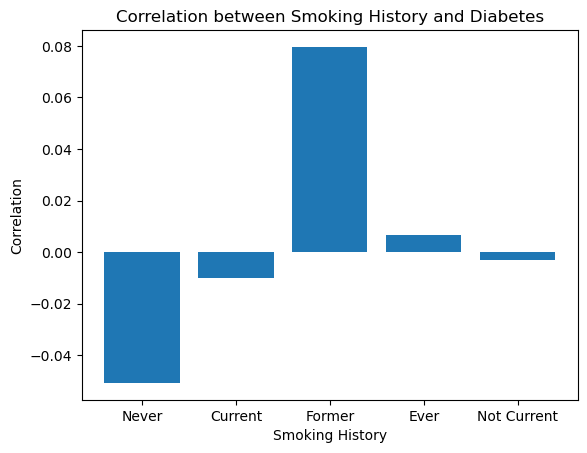

In [30]:
# Display bar chart of correlation between smoking history and (diabetes)
smoking_diabetes_corr_y = [correlation_smoking_diabetes_never, correlation_smoking_diabetes_current, correlation_smoking_diabetes_former, correlation_smoking_diabetes_ever, correlation_smoking_diabetes_not_current]
smoking_diabetes_corr_x = ['Never', 'Current', 'Former', 'Ever', 'Not Current']
plt.bar(smoking_diabetes_corr_x, smoking_diabetes_corr_y)
plt.title('Correlation between Smoking History and Diabetes')
plt.xlabel('Smoking History')
plt.ylabel('Correlation')
plt.show()

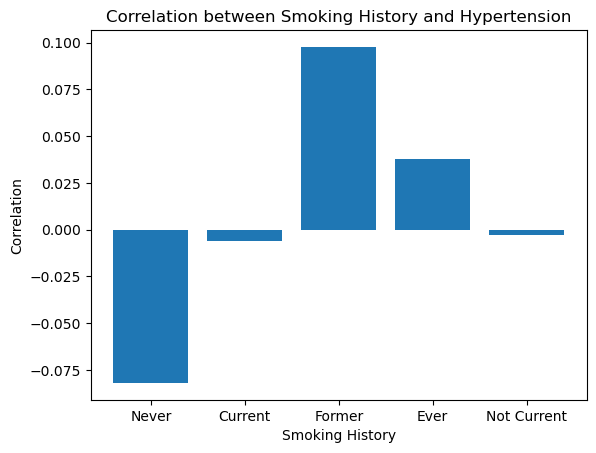

In [35]:
# Display bar chart of correlation between smoking history and (hypertension)
smoking_hypertension_corr_y = [correlation_smoking_hypertension_never, correlation_smoking_hypertension_current, correlation_smoking_hypertension_former, correlation_smoking_hypertension_ever, correlation_smoking_hypertension_not_current]
smoking_hypertension_corr_x = ['Never', 'Current', 'Former', 'Ever', 'Not Current']
plt.bar(smoking_hypertension_corr_x, smoking_hypertension_corr_y)
plt.title('Correlation between Smoking History and Hypertension')
plt.xlabel('Smoking History')
plt.ylabel('Correlation')
plt.show()

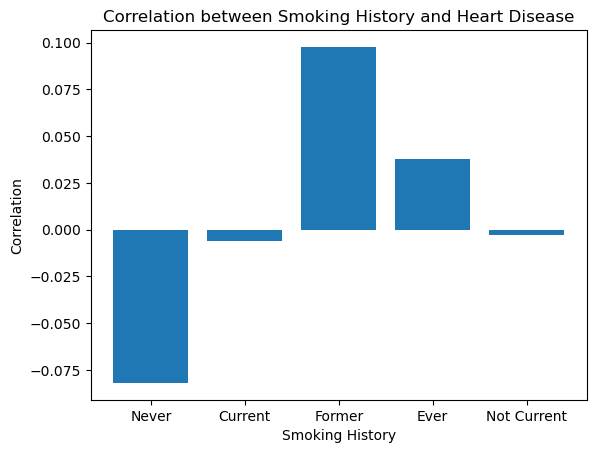

In [34]:
# Display bar chart of correlation between smoking history and (heart disease)
smoking_heart_disease_corr_y = [correlation_smoking_hypertension_never, correlation_smoking_hypertension_current, correlation_smoking_hypertension_former, correlation_smoking_hypertension_ever, correlation_smoking_hypertension_not_current]
smoking_heart_disease_corr_x = ['Never', 'Current', 'Former', 'Ever', 'Not Current']
plt.bar(smoking_heart_disease_corr_x, smoking_heart_disease_corr_y)
plt.title('Correlation between Smoking History and Heart Disease')
plt.xlabel('Smoking History')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# Compare census population data to the healthcare dataset. (Using the census API) (Data) (gender/age distribution) (Kenway) (compare for how accurate our study is compared to population)
